# Base ABM implementation 

In [14]:
@time "Loading packages" begin
    TAG = splitpath(@__FILE__)[end] |> x -> split(x, ".")[1] |> String    
    using Pkg; Pkg.activate("../test")
    using Test

    using Plots, StatsPlots, Plots.Measures
    default(leg = false, lw = 1.5)
    
    using SHUtils
    using DataFrames, DataFramesMeta
    using ProgressMeter
    using Distributions
    using ComponentArrays
    using StaticArrays
    using OrdinaryDiffEq
    using Parameters, DEBParamStructs
    using Random
    using DEBFigures
    using Revise

    using DEBBase
end

Loading packages: 0.127058 seconds (119.46 k allocations: 9.916 MiB, 61.10% compilation time)


  Activating project at `c:\Users\simon\Documents\Julia\DEBBase.jl\test`


In [91]:
p = DEBParamCollection()
p.glb.N0 = 10

p.glb.k_V = 0.1
p.glb.Xdot_in = 1250.
p.glb.t_max = 56.
p.spc.e_S = 0.5
p.spc.b_S = 100.
p.spc.eta_AR = 0.5

0.5

In [92]:
begin     
    p.glb.saveat = 1/24
    @time mout, aout = @replicates ABM(p) 3

    pa = @df aout plot(groupedlineplot(
        :t, :S, :cohort, 
        ylabel = "S [μg C]", 
        leg = :topleft, label = hcat(unique(:cohort)...), 
        legendtitle = "Cohort", 
        legendtitlefontsize = 8)
    )

    pX = @df mout lineplot(:t, :X_p, ylabel = "Xₚ [μg C]")
    pN = @df mout lineplot(:t, :N_tot, ylabel = "N [#]")
    
    plot(pa, pX, pN, xlabel = "time [d]")
end   

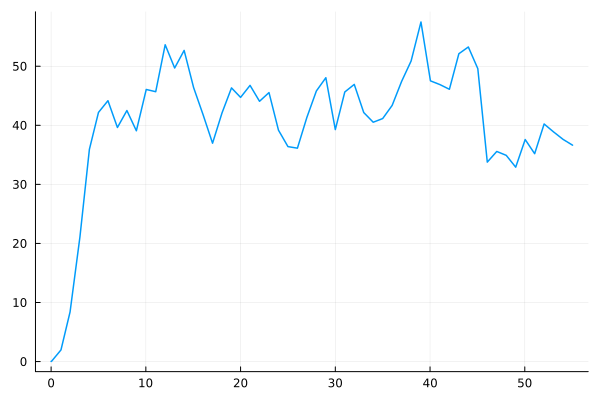

In [88]:
@df @subset(aout, :AgentID .== 1, :replicate .== 1) plot(:t, :S)

In [ ]:
@df aout lineplot(:t, )

In [84]:
p.spc.rulefuncs

3-element Vector{Function}:
 ingestion! (generic function with 1 method)
 reproduce_opportunistic! (generic function with 1 method)
 die! (generic function with 1 method)

In [65]:
sim

10-element Vector{Any}:
 (57×5 DataFrame
 Row │ t           X_p        C_W_1    N_tot    replicate 
     │ Float64     Float64    Float64  Float64  Int64     
─────┼────────────────────────────────────────────────────
   1 │  0.0        1225.0         0.0     10.0          1
   2 │  0.0416667  1249.48        0.0     10.0          1
   3 │  1.04167    1705.85        0.0     10.0          1
   4 │  2.0        1534.76        0.0     10.0          1
   5 │  3.04167     805.034       0.0     10.0          1
   6 │  4.04167      48.9796      0.0     10.0          1
   7 │  5.0          48.9796      0.0     10.0          1
   8 │  6.0          48.9796      0.0     10.0          1
  ⋮  │     ⋮           ⋮         ⋮        ⋮         ⋮
  51 │ 49.0417       48.9796      0.0     14.0          1
  52 │ 50.0417       48.9796      0.0     14.0          1
  53 │ 51.0417       48.9796      0.0     14.0          1
  54 │ 52.0417       48.9796      0.0     14.0          1
  55 │ 53.0417       48.9796    

In [63]:
j = 1


(570×5 DataFrame
 Row │ t           X_p        C_W_1    N_tot    replicate 
     │ Float64     Float64    Float64  Float64  Int64     
─────┼────────────────────────────────────────────────────
   1 │  0.0        1225.0         0.0     10.0          1
   2 │  0.0416667  1249.48        0.0     10.0          1
   3 │  1.04167    1705.85        0.0     10.0          1
   4 │  2.0        1534.76        0.0     10.0          1
   5 │  3.04167     805.034       0.0     10.0          1
   6 │  4.04167      48.9796      0.0     10.0          1
   7 │  5.0          48.9796      0.0     10.0          1
   8 │  6.0          48.9796      0.0     10.0          1
  ⋮  │     ⋮           ⋮         ⋮        ⋮         ⋮
 564 │ 49.0417       48.9796      0.0     14.0         10
 565 │ 50.0417       48.9796      0.0     14.0         10
 566 │ 51.0417       48.9796      0.0     14.0         10
 567 │ 52.0417       48.9796      0.0     14.0         10
 568 │ 53.0417       48.9796      0.0     14.0         1

In [123]:
NTuple{3,DataFrame} <: Tuple

true